In [ ]:
# drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/machine learning with python/gearbox failure dataset (1).csv')

In [ ]:
data.head(5)

,Load_%,Temperature_C,Vibration_mm_s,Oil_Level_%,Failure
0,1.170199,-1.610199,1.290988,-1.410081,0
1,0.198680,1.999221,0.504205,1.488123,1
2,1.695723,0.626734,0.569711,-0.277651,1
3,-0.531455,-0.669270,-1.600362,-2.724787,0
4,0.194052,-2.979343,-0.202986,1.018522,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Load_%          1000 non-null   float64
 1   Temperature_C   1000 non-null   float64
 2   Vibration_mm_s  1000 non-null   float64
 3   Oil_Level_%     1000 non-null   float64
 4   Failure         1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [ ]:
data.describe()

,Load_%,Temperature_C,Vibration_mm_s,Oil_Level_%,Failure
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.019106,0.009486,0.732060,-0.751864,0.499000
std,1.025963,1.620364,1.595817,1.571900,0.500249
min,-2.929449,-4.450596,-4.278978,-4.337231,0.000000
25%,-0.742637,-1.453959,-0.181916,-1.808776,0.000000
50%,-0.004724,0.233930,1.053498,-1.202489,0.000000
75%,0.673381,1.445834,1.866559,0.224259,1.000000
max,3.243093,3.360860,4.341188,5.119524,1.000000


In [ ]:
data.isna().sum()

,0
Load_%,0
Temperature_C,0
Vibration_mm_s,0
Oil_Level_%,0
Failure,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Load_%          1000 non-null   float64
 1   Temperature_C   1000 non-null   float64
 2   Vibration_mm_s  1000 non-null   float64
 3   Oil_Level_%     1000 non-null   float64
 4   Failure         1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [ ]:
data.columns

Index(['Load_%', 'Temperature_C', 'Vibration_mm_s', 'Oil_Level_%', 'Failure'], dtype='object')

In [ ]:
data.skew(numeric_only=True)

,0
Load_%,0.004137
Temperature_C,-0.222989
Vibration_mm_s,-0.773691
Oil_Level_%,0.686117
Failure,0.004006


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

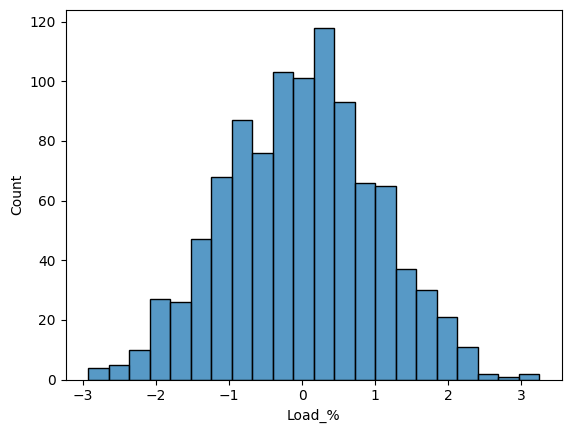

In [ ]:
sns.histplot(data['Load_%'])
plt.show()

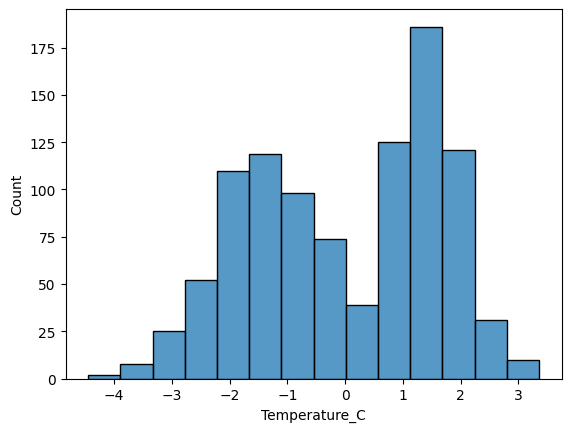

In [ ]:
sns.histplot(data['Temperature_C'])
plt.show()

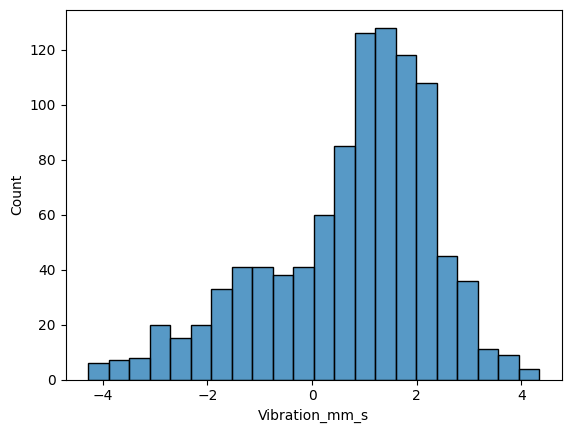

In [ ]:
sns.histplot(data['Vibration_mm_s'])
plt.show()

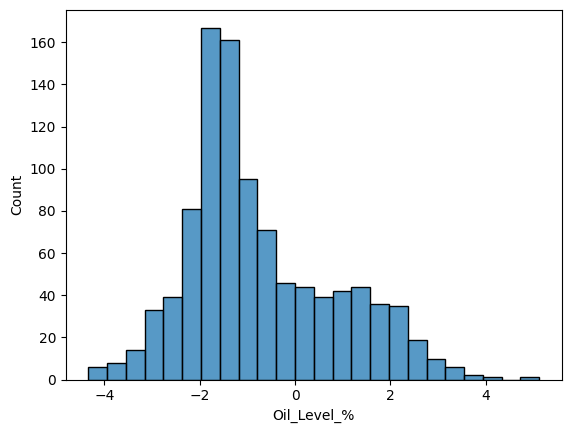

In [ ]:
sns.histplot(data['Oil_Level_%'])
plt.show()

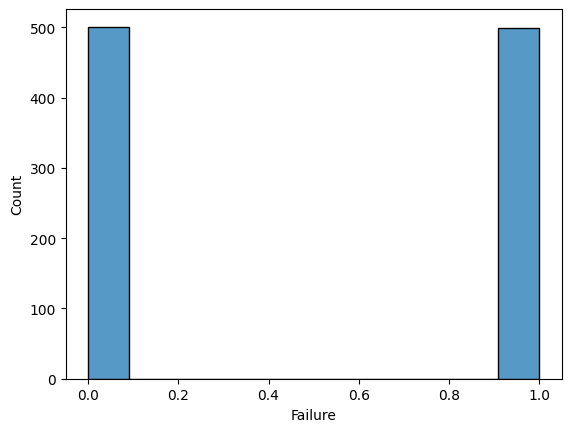

In [ ]:
sns.histplot(data['Failure'])
plt.show()

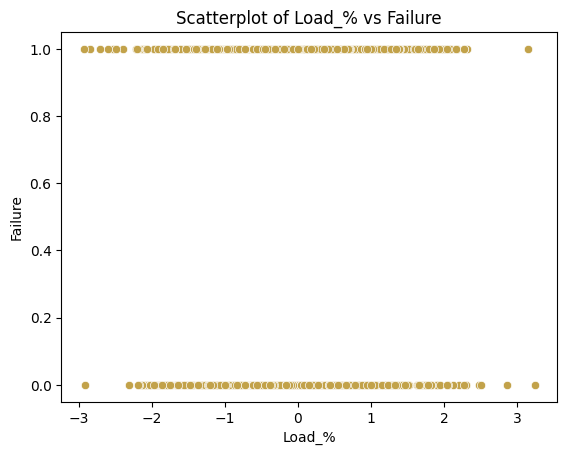

In [ ]:
sns.scatterplot(data=data, x="Load_%", y="Failure", color="#c2a24a")
plt.xlabel("Load_%")
plt.ylabel("Failure")
plt.title("Scatterplot of Load_% vs Failure")
plt.show()

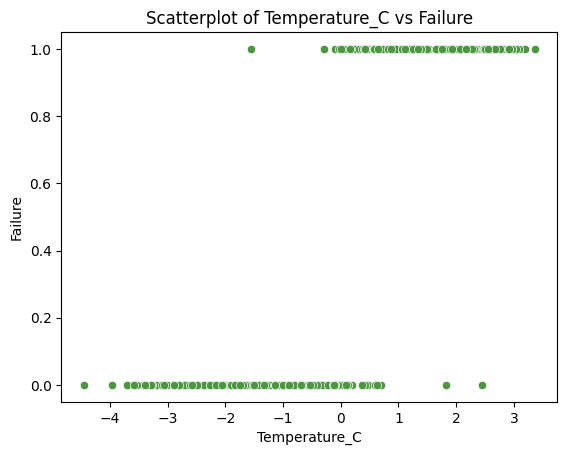

In [ ]:
sns.scatterplot(data=data, x="Temperature_C", y="Failure", color="#4c9641")
plt.xlabel("Temperature_C")
plt.ylabel("Failure")
plt.title("Scatterplot of Temperature_C vs Failure")
plt.show()

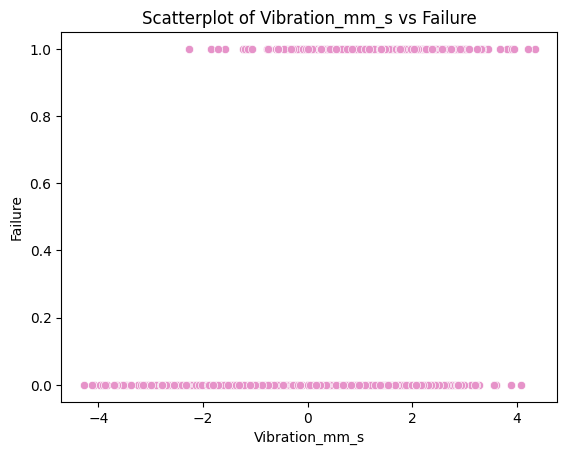

In [ ]:
sns.scatterplot(data=data, x="Vibration_mm_s", y="Failure", color="#e693c9")
plt.xlabel("Vibration_mm_s")
plt.ylabel("Failure")
plt.title("Scatterplot of Vibration_mm_s vs Failure")
plt.show()

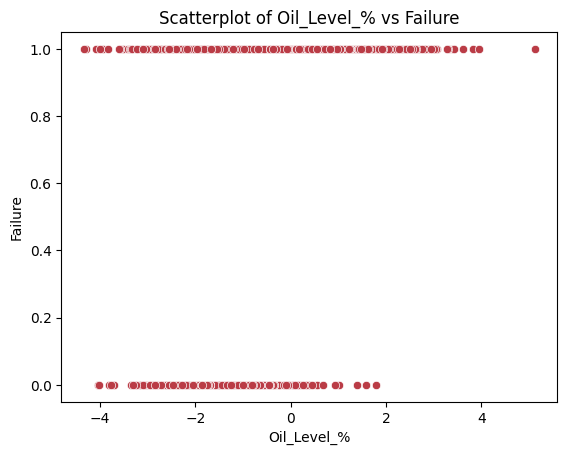

In [ ]:
sns.scatterplot(data=data, x="Oil_Level_%", y="Failure", color="#ba3c46")
plt.xlabel("Oil_Level_%")
plt.ylabel("Failure")
plt.title("Scatterplot of Oil_Level_% vs Failure")
plt.show()

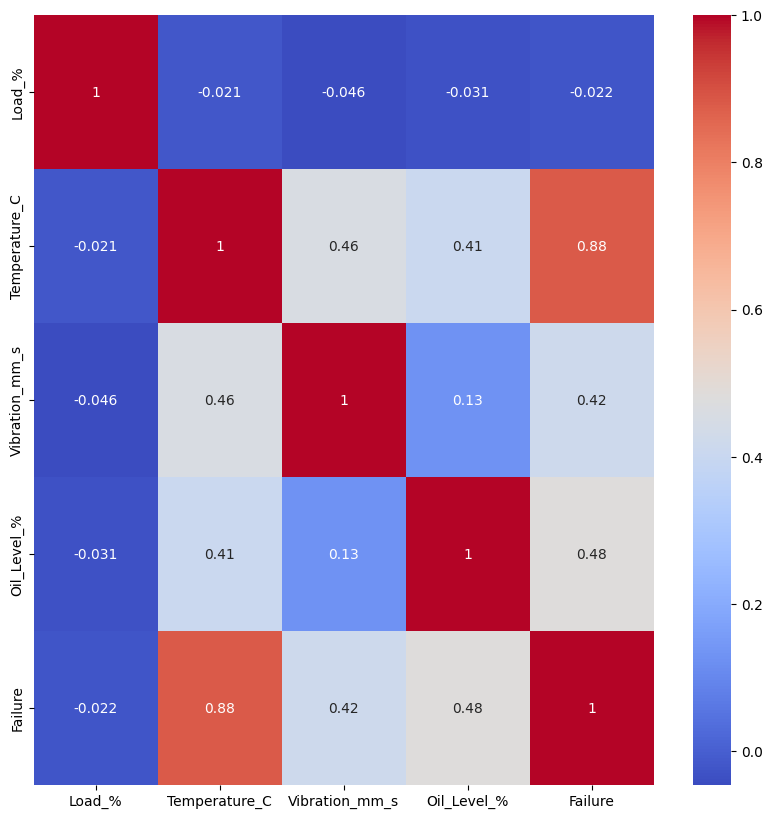

In [ ]:
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

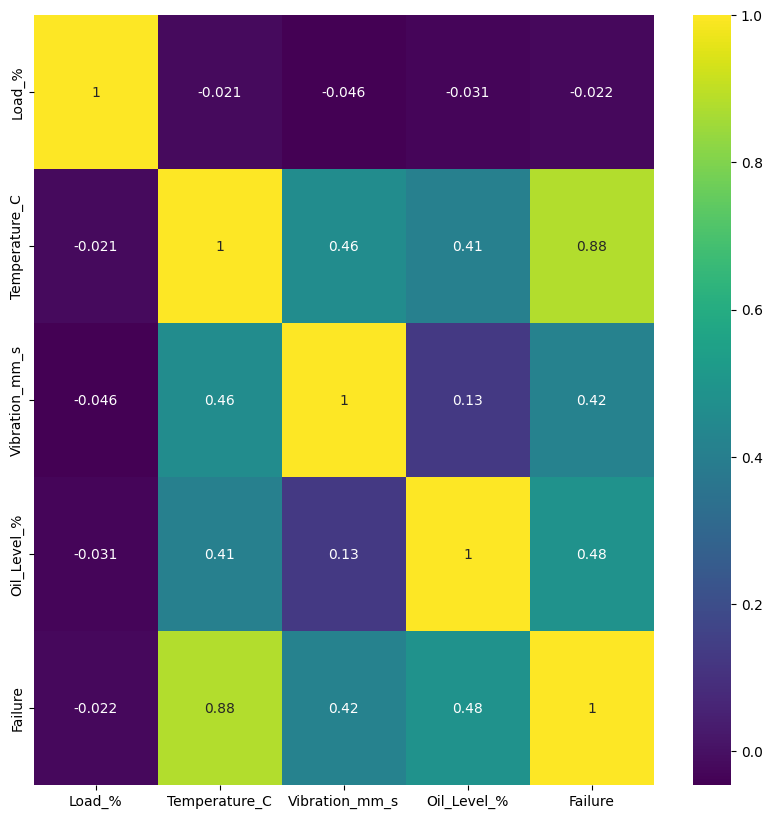

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap="viridis")
plt.show()

In [ ]:
# splitting data in features and target variable

x = data.drop("Failure", axis = 1)
y = data["Failure"]

In [ ]:
data["Failure"].value_counts()

,count
Failure,
0,501
1,499


In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# logistic regressor
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

#prediction
y_pred_lr = lr.predict(x_test)

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score
acc_lr=accuracy_score(y_test, y_pred_lr)
print(acc_lr)

0.97


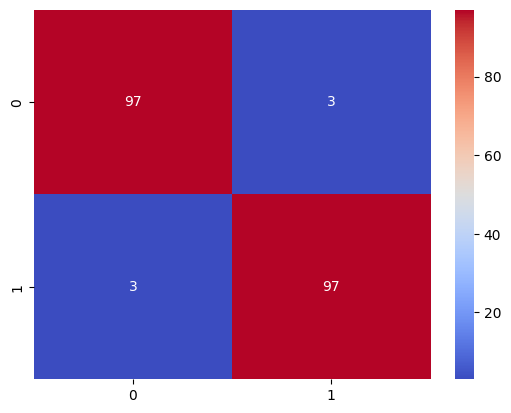

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# visualize cm
sns.heatmap(cm_lr, annot=True, cmap="coolwarm",fmt="d")
plt.show()

In [ ]:
# decision tree regressor
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred_dt=dt.predict(x_test)

#accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print(acc_dt)

0.955


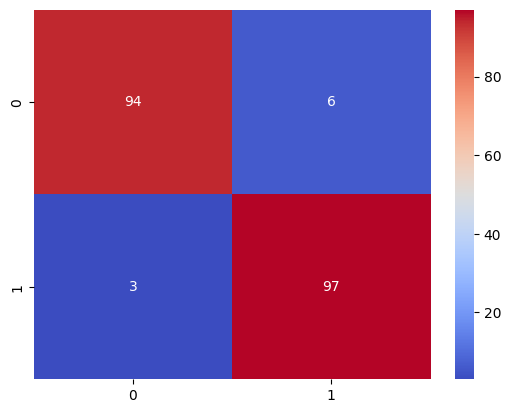

In [ ]:
# cm of decision tree regressor
cm_dt = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm_dt, annot=True, cmap="coolwarm",fmt="d")
plt.show()

In [ ]:
# random forest regressor
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

# accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print(acc_rf)

0.975


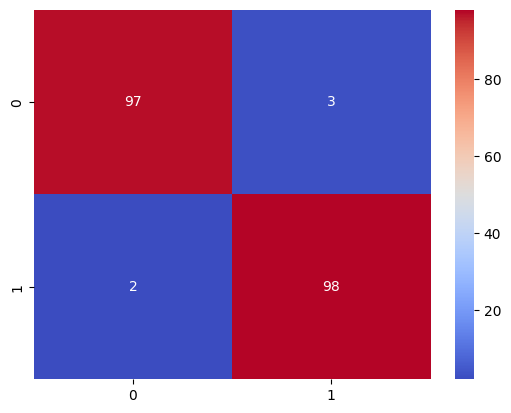

In [ ]:
# cm of random tree regressor
cm_rf = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap="coolwarm",fmt="d")
plt.show()

In [ ]:
# xgboost Classifier
from xgboost import XGBClassifier
xgbr = XGBClassifier()
xgbr.fit(x_train,y_train)

y_pred_xgbr = xgbr.predict(x_test)

# accuracy
acc_xgbr = accuracy_score(y_test, y_pred_xgbr)
print(acc_xgbr)

0.965


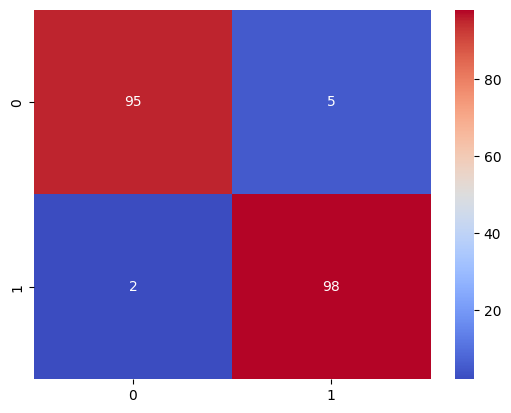

In [ ]:
# cm of xgboost Classifier
cm_xgbr = confusion_matrix(y_test,y_pred_xgbr)
sns.heatmap(cm_xgbr, annot=True, cmap="coolwarm",fmt="d")
plt.show()

In [ ]:
# model interpretation

importances = pd.Series(rf.feature_importances_, index=x.columns)

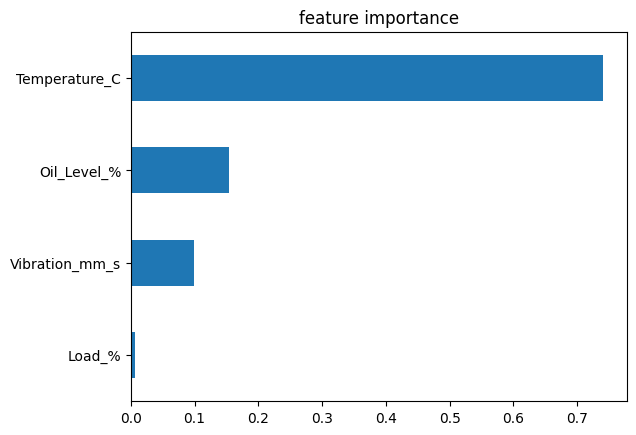

In [ ]:
importances.sort_values().plot(kind="barh",title="feature importance")
plt.show()

In [ ]:
# download rf model using joblib
import joblib
joblib.dump(rf, "gearbox_failure_prediction.pkl")
from google.colab import files
files.download("gearbox_failure_prediction.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>